<a href="https://colab.research.google.com/github/JamesEdMichaud/cs480student/blob/main/04/Michaud_CS480_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

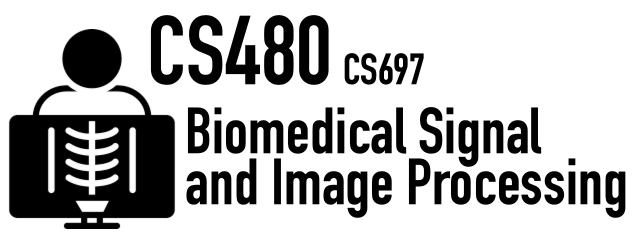
#Assignment 4

In [ ]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia!

In [1]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# we are using mahotas again, so lets install it!
!pip install mahotas

     |████████████████████████████████| 5.7MB 8.1MB/s 


In [3]:
# our imports include sklearn this time
import mahotas as mh
import os
from sklearn.ensemble import RandomForestClassifier

**Task 1:** Download, extract, and load the data! [15 Points]

In [ ]:
# Please download this file: https://cs480.org/data/xray.zip
# This is a subset of the Kaggle Pneumonia Dataset!
#
# TODO: Upload xray.zip using the file panel on the left.

In [4]:
# Run this code to extract the zip file and to create
# the folder structure of normal/ and pneumonia/ images.
# Each folder contains the first images of the Kaggle dataset.
import zipfile
with zipfile.ZipFile('xray.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

NORMAL_DIR = 'normal/'
PNEUMONIA_DIR = 'pneumonia/'

In [5]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')

In [ ]:
# TODO: Please display this image and print the dimensions!

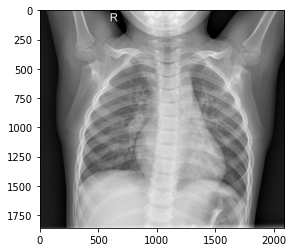

Dimensions:  (1858, 2090)


In [12]:
# TODO: YOUR CODE
pylab.imshow(img, cmap="gray") # Default color map made it look green
pylab.show()
print("Dimensions: ", img.shape)

**Task 2:** Let's do some data wrangling and more visualization! [35 Points]

In [13]:
# This code loads all normal images into a numpy array.
normal_files = os.listdir( NORMAL_DIR )
normal_images = np.zeros( (len(normal_files), 300, 300), dtype=np.float32)
for i in range(len(normal_files)):
  loaded_image = mh.imread( NORMAL_DIR + normal_files[i], as_grey=True )
  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape
  normal_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [15]:
# This code loads all pneumonia images into a numpy array.
pneumonia_files = os.listdir( PNEUMONIA_DIR )
pneumonia_images = np.zeros( (len(pneumonia_files), 300, 300), dtype=np.float32)
for i in range(len(pneumonia_files)):
  loaded_image = mh.imread( PNEUMONIA_DIR + pneumonia_files[i], as_grey=True )
  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape
  pneumonia_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [ ]:
# The two code blocks above perform 2 data wrangling operations.
# Which ones?
# Hint: The first one might be more obvious but the second one happens in the
# last line of each block.
# TODO: Operation 1) Normalization (resize every image)
# TODO: Operation 2) Concatenation (into a numpy array)

In [ ]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.
# TODO: Please visualize multiple images at once.
# Hint: You can use one of the following answers from StackOverflow for this:
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

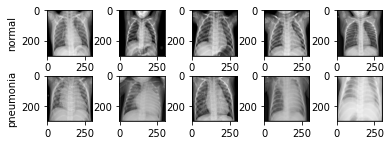

In [67]:
fig = plt.figure()
for i in range(5):
  ax1 = fig.add_subplot(1, 5, i+1)
  plt.imshow(normal_images[i], cmap="gray")
  ax2 = fig.add_subplot(2, 5, i+1+5)
  plt.imshow(pneumonia_images[i], cmap="gray")
  if i == 0:
    ax1.set_ylabel("normal")
    ax2.set_ylabel("pneumonia")
fig.subplots_adjust(wspace=0.6, hspace=0.5) # prevents pixel count overlap


**Task 3:** Setup training and testing data. [15 Points]

In [ ]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays and pneumonia xrays.
#
# The training data will include 120 images (60 normal, 60 pneumonia).
# The testing data will include the remaining 80 images (40 normal, 40 pneumonia).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the training_target vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia.

In [68]:
TRAINING_COUNT = 60

training_data = np.zeros( (TRAINING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[0:TRAINING_COUNT] ):
  training_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[0:TRAINING_COUNT] ):
  training_data[i + TRAINING_COUNT] = p.ravel()

In [69]:
# TODO: Please create the training_target vector with 0 for a normal image, and
# 1 for a pneumonia.
training_target = np.zeros(TRAINING_COUNT * 2)
for i in range(TRAINING_COUNT, TRAINING_COUNT*2):
  training_target[i] = 1

In [70]:
TESTING_COUNT = 40

testing_data = np.zeros( (TESTING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i + TESTING_COUNT] = p.ravel()

In [71]:
# TODO: Please create the testing_target vector with 0 for a normal image, and
# 1 for a pneumonia.
testing_target = np.zeros(TESTING_COUNT * 2)
for i in range(TESTING_COUNT, TESTING_COUNT*2):
  testing_target[i] = 1

**Task 4:** Let's train and evaluate the Random Forest! [35 Points]

In [88]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()

In [89]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is 
# normal or pneumonia.
fitted = clf.fit( training_data, training_target )

In [ ]:
# TODO: In just a few sentences, please explain how the Random Forest works.

In [ ]:
# TODO: A collection of decision trees (classifiers/estimators) that each vote on
#       a classification. The classification with the greatest number of votes
#       is the winner, and is thus the assessed classification of whatever is
#       being classified. It works because many heads are better than one. That
#       is, the group of decision trees will often make up for the
#       misclassifications made by a few, assuming the training data is effective
#       and that the data is in some way classifiable.

In [90]:
# After training, we can see how well the classifier predicts our testing data.
# The following command will return the classification accuracy.
clf.score( testing_data, testing_target )

0.9125

In [ ]:
# TODO: Is the classification accuracy good? And, are you surprised?

In [ ]:
# TODO: ~90% is certainly not as good as a pulmonologist would do, but it is
#       incredibly fast and has enough accuracy to be potentially useful. I sat
#       down with my husband to look at these x-rays and he pointed out what to
#       look for, so now I'm not too surprised it performed this well. Before I
#       did that I was quite surprised. I was more surprised at how quickly the
#       model was trained and able to classify with such accuracy.

**Bonus:** Let's take a closer look! [33 Points]

In [ ]:
# Can you figure out which images were misclassified?
# Hint: You can use predictions = clf.predict(testing_data) for this.
# Can you display them?
# Do you have an idea why these images were problematic?

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
IM-0231-0001.jpeg
IM-0229-0001.jpeg
IM-0164-0001.jpeg
IM-0250-0001.jpeg
person20_bacteria_69.jpeg
person15_bacteria_52.jpeg
person24_bacteria_112.jpeg


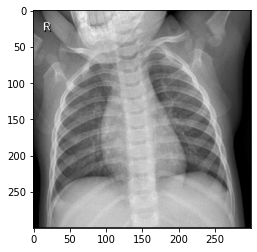

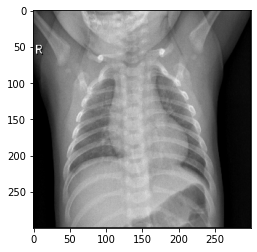

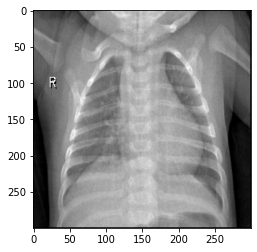

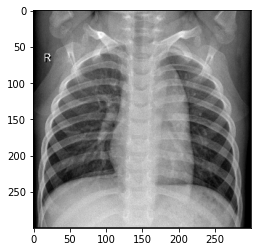

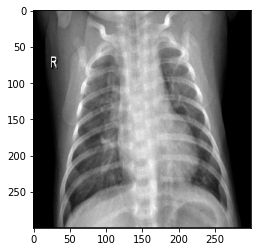

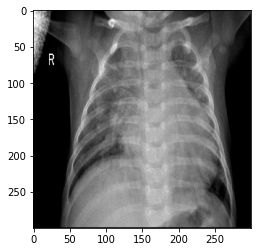

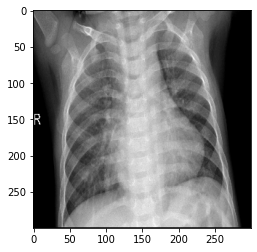

In [103]:
# TODO: YOUR CODE AND YOUR ANSWER
# From what I can tell, the misclassifications are the result of insufficient
# contrast between lung tissue and other tissue. The false positives appear to
# have lung pixels with greater intensity, and the false negatives appear to
# have lung pixels with lower intensity, obscuring the infected tissue.

predictions = clf.predict(testing_data)
print(predictions)
print(testing_target)
n_subset  =    normal_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT]
p_subset  = pneumonia_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT]
nf_subset =     normal_files[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT]
pf_subset =  pneumonia_files[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT]
for i in range(len(testing_target)):
  if predictions[i] != testing_target[i]:
    mis  =  n_subset[i] if testing_target[i] == 0 else  p_subset[i-TESTING_COUNT]
    misf = nf_subset[i] if testing_target[i] == 0 else pf_subset[i-TESTING_COUNT]
    plt.figure()
    plt.imshow(mis, cmap="gray")
    print(misf)

In [ ]:
# TODO: How can we improve the classification performance?
# Hint: Ideas without code are fine as well.

In [250]:
# TODO: YOUR ANSWER
# We can improve performance by enhancing the constrast such that healthy lung
# tissue does not have such high intensity values in the image. This will allow
# the infected tissue to become more apparent, as it generally presents as
# brighter clusters of pixels in the lungs.

# To start I will create a new copy of the training and testing data.
# I know that's not needed, but I don't like to replace existing data variables
# in case additional work is to be done on them.

img_size = 300
normal_images2 = np.zeros( (len(normal_files), img_size, img_size), dtype=np.float32)
for i in range(len(normal_files)):
  loaded_image = mh.imread( NORMAL_DIR + normal_files[i], as_grey=True )
  loaded_image = mh.imresize( loaded_image, (img_size, img_size) )
  img_shape = loaded_image.shape
  normal_images2[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

pneumonia_images2 = np.zeros( (len(pneumonia_files), img_size, img_size), dtype=np.float32)
for i in range(len(pneumonia_files)):
  loaded_image = mh.imread( PNEUMONIA_DIR + pneumonia_files[i], as_grey=True )
  loaded_image = mh.imresize( loaded_image, (img_size, img_size) )
  img_shape = loaded_image.shape
  pneumonia_images2[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

training_data2 = np.zeros( (TRAINING_COUNT * 2, img_size*img_size ), dtype=np.float32)
for i, n in enumerate( normal_images2[0:TRAINING_COUNT] ):
  training_data2[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images2[0:TRAINING_COUNT] ):
  training_data2[i + TRAINING_COUNT] = p.ravel()
testing_data2 = np.zeros( (TESTING_COUNT * 2, img_size*img_size ), dtype=np.float32)
for i, n in enumerate( normal_images2[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data2[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images2[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data2[i + TESTING_COUNT] = p.ravel()

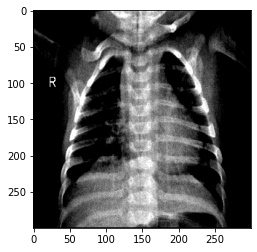

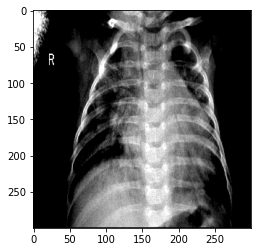

In [452]:
# Contrast / clipping algorithm found here: https://stackoverflow.com/a/60451355
# from user Johan Dettmar

# To enhance the contrast of each image, we will calculate the intensity value
# at each of these percentiles. If, for example, the intensity value at the 40th
# and 99th percentile is 115 and 250, then the constrast will be adjusted as if
# the pixel intensity range of the entire image is between 115 and 250.
intensity_percentile_floor = 40
intensity_percentile_ceiling = 99

training_data3 = np.zeros( (TRAINING_COUNT * 2, img_size*img_size ), dtype=np.float32)
testing_data3 = np.zeros( (TESTING_COUNT * 2, img_size*img_size ), dtype=np.float32)

for i in range(len(training_data2)):
  min = np.percentile(training_data2[i], intensity_percentile_floor)
  max = np.percentile(training_data2[i], intensity_percentile_ceiling)
  training_data3[i] = np.clip(training_data2[i], min, max)
  training_data3[i] = ((training_data3[i] - min) / (max - min)) * 255

for i in range(len(testing_data2)):
  min = np.percentile(testing_data2[i], intensity_percentile_floor)
  max = np.percentile(testing_data2[i], intensity_percentile_ceiling)
  testing_data3[i] = np.clip(testing_data2[i], min, max)
  testing_data3[i] = ((testing_data3[i] - min) / (max - min)) * 255

# Here are two of the problem images from above. You can see that the lung 
# matter appears to turn black in the top picture. This is a normal x-ray.
# In the bottom picture you can still see some infected lung tissue in the
# chest, showing signs of pneumonia.
plt.figure()
plt.imshow(testing_data3[16].reshape(img_size, img_size), cmap="gray")
plt.figure()
plt.imshow(testing_data3[58].reshape(img_size, img_size), cmap="gray")

In [449]:
# I was consistently able to get scores above 95%, with the occasional score 
# landing at 98.75%, meaning only a single image was misclassified.

# I increased the number of estimators from the default 100 to 300. This gave
# more consistent results when repeatedly running tests.
clf2 = RandomForestClassifier(n_estimators=300)
fitted2 = clf2.fit( training_data3, training_target )
clf2.score( testing_data3, testing_target )

0.9875

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]


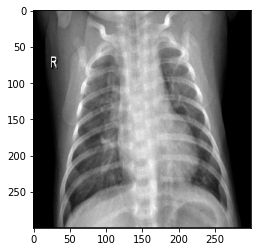

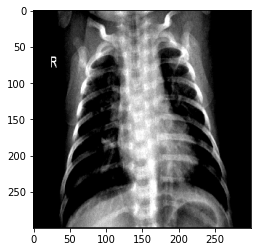

In [457]:
predictions2 = clf2.predict(testing_data3)
print(predictions2)
print(testing_target)

# Here is the single misclassified image, before and after the contrast adjustment
plt.figure()
plt.imshow(testing_data2[46].reshape(img_size, img_size), cmap="gray")
plt.figure()
plt.imshow(testing_data3[46].reshape(img_size, img_size), cmap="gray")

In [ ]:
# Great job!!!
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw